




# Импорт библиотек

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import umap.umap_ as umap

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances

# Предобработка данных

Для выполнения задания возьмем датасет NBA 2k20 player dataset и изучим основную информацию о нем

In [2]:
df = pd.read_csv('nba2k-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


Информация о датасете

In [3]:
df.shape

(439, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    439 non-null    object
 1   rating       439 non-null    int64 
 2   jersey       439 non-null    object
 3   team         416 non-null    object
 4   position     439 non-null    object
 5   b_day        439 non-null    object
 6   height       439 non-null    object
 7   weight       439 non-null    object
 8   salary       439 non-null    object
 9   country      439 non-null    object
 10  draft_year   439 non-null    int64 
 11  draft_round  439 non-null    object
 12  draft_peak   439 non-null    object
 13  college      370 non-null    object
 14  version      439 non-null    object
dtypes: int64(2), object(13)
memory usage: 51.6+ KB


Преобразуем данные в столбцах: уберем знак доллар в зарплатах, рост и вес приведем к чесленному формату, измеряя рост в метрах, а вес в кг

In [5]:
for i in range(df.shape[0]):         # обработка даты рождения
    s = df['b_day'][i]
    if s[6] == '0' or s[6] == '1' or s[6] == '2':
        s = s[0:6] + '20' + s[6:8]
    else:
        s = s[0:6] + '19' + s[6:8]
    df['b_day'][i] = s
    s = ''
df['b_day'] = pd.to_datetime(df['b_day'], format='%m/%d/%Y')

df['height_meters'] = float(0)  #обработка роста
for i in range(len(df['height'])):
    s = df['height'][i].split('/')
    df['height_meters'][i] = float(s[1])
    s = ''

df['weight_kg'] = float(0)  #обработка веса
for i in range(len(df['weight'])):
    s = df['weight'][i].split('/')
    s1 = s[1].split()
    df['weight_kg'][i] = float(s1[0])
    s = ''
    s1 = ''

df['salary_dollars'] = int(0)  #обработка зарплаты
for i in range(len(df['salary'])):
    s = df['salary'][i]
    df['salary_dollars'][i] = int(s[1:])
    s = ''    
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   full_name       439 non-null    object        
 1   rating          439 non-null    int64         
 2   jersey          439 non-null    object        
 3   team            416 non-null    object        
 4   position        439 non-null    object        
 5   b_day           439 non-null    datetime64[ns]
 6   height          439 non-null    object        
 7   weight          439 non-null    object        
 8   salary          439 non-null    object        
 9   country         439 non-null    object        
 10  draft_year      439 non-null    int64         
 11  draft_round     439 non-null    object        
 12  draft_peak      439 non-null    object        
 13  college         370 non-null    object        
 14  version         439 non-null    object        
 15  height

А также заполним пропуски

In [6]:
df['team'] = df['team'].fillna('not specified')
df['college'] = df['college'].fillna('not specified')

# Спроецируем тренировочные данные в 2d 

<AxesSubplot:>

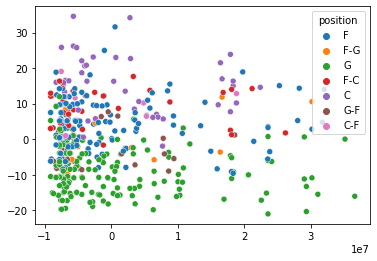

In [7]:
X = df[['rating', 'weight_kg', 'height_meters', 'salary_dollars']]
y = df['position']

pca = PCA(n_components=2)
pca.fit(X)
X_PCA_reduced = pca.fit_transform(X)
sns.scatterplot(x=X_PCA_reduced[:, 0], y=X_PCA_reduced[:, 1], hue=y)

В области с высокой плотностью тяжело делать какие либо выводы

Применим алгоритм TSNE

<AxesSubplot:>

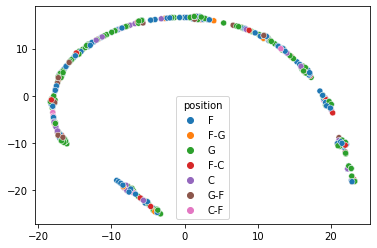

In [8]:
tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='random')
X_TSNE_reduced = tsne.fit_transform(X)
sns.scatterplot(x=X_TSNE_reduced[:, 0], y=X_TSNE_reduced[:, 1], hue=y)

Применим UMAP

<AxesSubplot:>

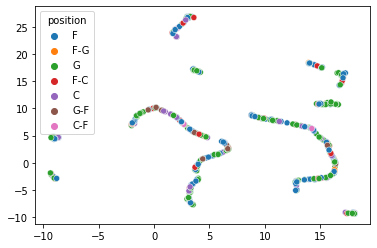

In [9]:
reducer = umap.UMAP(n_neighbors=10, min_dist=0.3, random_state=42)
X_UMAP_reduced = reducer.fit_transform(X)
sns.scatterplot(x=X_UMAP_reduced[:, 0], y=X_UMAP_reduced[:, 1], hue=y)

# Кластеризация

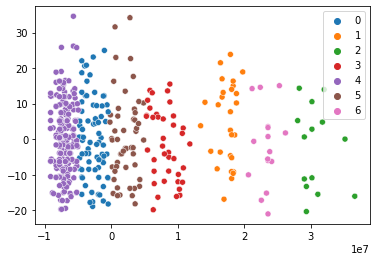

средние внутрикластерное расстояние: 7366855.309
межкласторное расстояние: 1073851.630


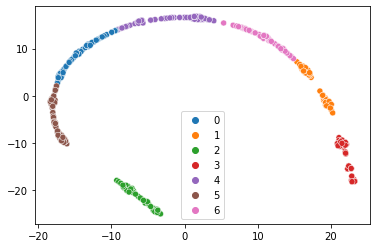

средние внутрикластерное расстояние: 11.987
межкласторное расстояние: 3.232


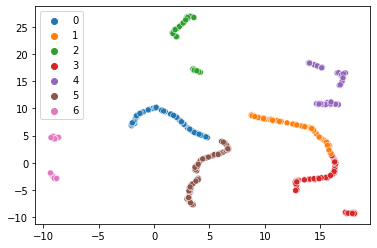

средние внутрикластерное расстояние: 7.455
межкласторное расстояние: 3.163


In [10]:
def cluster():
    kmeans = KMeans(n_clusters=7).fit(X_reduced)
    sns.scatterplot(x=X_reduced[:, 0],
                    y=X_reduced[:, 1],
                    hue=kmeans.labels_,
                    palette=sns.color_palette(n_colors=7))
    plt.show()
    mean_center_distance = np.triu(
        euclidean_distances(kmeans.cluster_centers_), 1).mean()
    print(f"средние внутрикластерное расстояние: {mean_center_distance:.3f}")
    mean_distance_to_center = np.mean([
        euclidean_distances([kmeans.cluster_centers_[kmeans.labels_[idx]]],
                            [point]) for idx, point in enumerate(X_reduced)
    ])
    print(f"межкласторное расстояние: {mean_distance_to_center:.3f}")
    
for X_reduced in [X_PCA_reduced, X_TSNE_reduced, X_UMAP_reduced]:
    cluster()

# Описание результатов

### Результат работы алгоритма PCA.
Данный алгоритм показал очень большие значения расстояний, а на графике трудно определить распределение точек в местах с высокой плотностью. Тем не менее, после кластеризации можно выявить примерные области распределения.

### Результат работы алгоритма TSNE.
Средние значения расстояний значительно сократились, что позволяет нам гораздо лучше видеть распределение тех или иных групп точек на графике. Однако, график представлен единой неразравной фигурой, в связи с чем могут возникнуть проблемы при рассмотрении точек на стыках различных кластеров.

### Результат работы алгоритма UMAP.
Данный алгоритм показал еще лучшие значения средних расстояний. Также можно заметить что почти все кластеры на графике расположены обособленно, что позволяет намного лучше анализировать график. Явно заметны все кластеры, очень плотное распределение точек на графике.